In [1]:
import random
import torch
from d2l import torch as d2l

/Users/bytedance/Desktop/AI_learning/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0], '\nlabels:', labels[0])

features: tensor([-0.5256,  0.7905]) 
labels: tensor([0.4551])


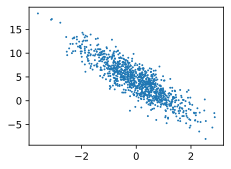

In [15]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

In [16]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [18]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.7336,  0.6188],
        [ 0.2678, -0.3005],
        [ 0.7830,  0.4480],
        [ 1.4246, -0.3958],
        [ 1.3686,  0.0733],
        [ 0.3643,  0.5152],
        [ 0.9187,  0.1645],
        [-0.4464,  1.1052],
        [ 0.6630,  0.2310],
        [ 0.4423, -0.8369]]) 
 tensor([[ 5.5475],
        [ 5.7630],
        [ 4.2464],
        [ 8.3959],
        [ 6.6954],
        [ 3.1768],
        [ 5.4577],
        [-0.4513],
        [ 4.7384],
        [ 7.9471]])


In [19]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [20]:
def linreg(X, w, b):    #@save
    return torch.matmul(X, w) + b

In [21]:
def squared_loss(y_hat, y): #@save
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [22]:
def sgd(params, lr, batch_size):    #@save
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [23]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.036596
epoch 2, loss 0.000129
epoch 3, loss 0.000052


In [24]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.0003, -0.0006], grad_fn=<SubBackward0>)
b的估计误差: tensor([4.9114e-05], grad_fn=<RsubBackward1>)
